In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os 
os.chdir("D:/Downloads/ZS")
os.listdir()

['catboost_info',
 'cb_sub.csv',
 'cb_sub2.csv',
 'cb_subhighest.csv',
 'final_submission.csv',
 'final_submission2.csv',
 'final_submissionsvm.csv',
 'lgb_sub.csv',
 'rf_sub.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'xgb_sub.csv',
 'xgb_sub2.csv',
 'xgb_subhighest.csv',
 'ZS Associates Challenge Data Science Intern (2).py',
 'ZS Associates Challenge Data Science Intern.ipynb',
 'ZS Associates Challenge Data Science Intern.py',
 'ZS Associates Challenge Data Science.py',
 'ZS Problem Solving Approach.docx']

In [2]:
train=pd.read_csv('train.csv')
train.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,social_account_number,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,84,141,0,37,14.69,415,111,WV,11.2,...,330-8173,97,43.96,18.87,yes,3.02,222.0,5,258.6,0
1,1,99,108,2,30,NaN,510,113,LA,9.8,...,380-7624,95,47.02,18.71,yes,2.65,220.1,6,276.6,0
2,2,111,96,1,0,9.22,415,105,MA,9.1,...,359-9369,91,29.56,24.43,no,2.46,287.4,7,173.9,0
3,3,100,105,0,0,11.04,415,108,NV,7.7,...,376-4540,140,38.83,12.33,no,2.08,145.1,7,228.4,0
4,4,92,59,1,0,5.15,510,88,CO,12.5,...,331-3842,89,26.11,17.47,no,3.38,205.5,10,153.6,0


In [3]:
train.shape

(2233, 22)

In [4]:
train['turn_anti_social'].value_counts()

0    1910
1     323
Name: turn_anti_social, dtype: int64

In [5]:
test=pd.read_csv('test.csv')
test['turn_anti_social']=0 #declaring randomly
test.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,social_account_number,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,130,100,2,0,2.86,415,69,CT,7.3,...,389-2114,122,40.09,14.96,no,1.97,176.0,1,235.8,0
1,1,91,73,1,0,12.48,415,97,VT,10.3,...,414-1496,89,37.03,18.75,no,2.78,220.6,6,217.8,0
2,2,123,137,2,0,11.73,415,115,NY,11.4,...,389-2540,98,29.58,13.71,no,3.08,161.3,3,174.0,0
3,3,110,89,1,0,10.23,408,115,DE,12.8,...,421-9144,106,33.51,14.10,no,3.46,165.9,3,197.1,0
4,4,81,27,5,0,7.44,510,101,OR,15.0,...,355-2840,87,39.46,17.92,no,4.05,210.8,6,232.1,0


In [6]:
test.shape

(1100, 22)

In [7]:
df_all=train.append(test)

In [8]:
df_all_old=df_all.copy()

In [9]:
df_all.shape

(3333, 22)

In [10]:
df_all.dtypes

uid                                   int64
total_facebook_statuses               int64
account_membership_period             int64
service_support_calls                 int64
number_of_snaps                       int64
total_whatsapp_charge               float64
sub_country_code                      int64
total_twitter_tweets                  int64
country                              object
total_email_characters              float64
email_plan                           object
total_whatsapp_msg_characters       float64
social_account_number                object
total_whatsapp_msgs                   int64
total_facebook_charge               float64
total_twitter_charge                float64
snapchat_plan                        object
total_email_charge                  float64
total_twitter_tweet_characters      float64
total_emails                          int64
total_facebook_status_characters    float64
turn_anti_social                      int64
dtype: object

In [11]:
df_all.describe()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,total_email_characters,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3121.000000,3333.000000,3333.000000,3116.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3119.000000,3333.000000,3118.000000,3333.000000
mean,929.036304,100.435644,101.064806,1.562856,8.099010,9.045540,437.182418,100.114311,10.248909,200.872037,100.107711,30.562307,17.083540,2.764581,201.510965,4.479448,179.611931,0.096910
std,618.659850,20.069084,39.822106,1.315491,13.688365,2.279357,42.371290,19.922625,2.794114,50.573847,19.568609,9.259435,4.310668,0.753773,50.596502,2.461214,54.211561,0.295879
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.040000,408.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,416.000000,87.000000,74.000000,1.000000,0.000000,7.520000,408.000000,87.000000,8.500000,167.000000,87.000000,24.430000,14.160000,2.300000,167.100000,3.000000,143.625000,0.000000
50%,833.000000,101.000000,101.000000,1.000000,0.000000,9.060000,415.000000,100.000000,10.300000,201.200000,100.000000,30.500000,17.120000,2.780000,202.400000,4.000000,179.300000,0.000000
75%,1399.000000,114.000000,127.000000,2.000000,20.000000,10.610000,510.000000,114.000000,12.100000,235.300000,113.000000,36.790000,20.000000,3.270000,235.500000,6.000000,216.000000,0.000000
max,2232.000000,165.000000,243.000000,9.000000,51.000000,17.770000,510.000000,170.000000,20.000000,395.000000,175.000000,59.640000,30.910000,5.400000,363.700000,20.000000,350.800000,1.000000


In [12]:
df_all.head(1)

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,social_account_number,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,84,141,0,37,14.69,415,111,WV,11.2,...,330-8173,97,43.96,18.87,yes,3.02,222.0,5,258.6,0


In [13]:
for i in df_all.columns:
    print(i,df_all[i].nunique())

uid 2233
total_facebook_statuses 119
account_membership_period 212
service_support_calls 10
number_of_snaps 46
total_whatsapp_charge 922
sub_country_code 3
total_twitter_tweets 123
country 51
total_email_characters 160
email_plan 2
total_whatsapp_msg_characters 1591
social_account_number 3333
total_whatsapp_msgs 120
total_facebook_charge 1667
total_twitter_charge 1440
snapchat_plan 2
total_email_charge 162
total_twitter_tweet_characters 1552
total_emails 21
total_facebook_status_characters 1611
turn_anti_social 2


In [14]:
for i in df_all.columns:
    if df_all[i].dtype==np.dtype('O'):
        print(i,df_all[i].nunique())

country 51
email_plan 2
social_account_number 3333
snapchat_plan 2


In [15]:
df_all.drop(['social_account_number'],axis=1,inplace=True)

In [16]:
df_all.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,84,141,0,37,14.69,415,111,WV,11.2,...,326.4,97,43.96,18.87,yes,3.02,222.0,5,258.6,0
1,1,99,108,2,30,NaN,510,113,LA,9.8,...,177.9,95,47.02,18.71,yes,2.65,220.1,6,276.6,0
2,2,111,96,1,0,9.22,415,105,MA,9.1,...,204.8,91,29.56,24.43,no,2.46,287.4,7,173.9,0
3,3,100,105,0,0,11.04,415,108,NV,7.7,...,245.3,140,38.83,12.33,no,2.08,145.1,7,228.4,0
4,4,92,59,1,0,5.15,510,88,CO,12.5,...,114.5,89,26.11,17.47,no,3.38,205.5,10,153.6,0


In [17]:
df_all.isnull().sum()

uid                                   0
total_facebook_statuses               0
account_membership_period             0
service_support_calls                 0
number_of_snaps                       0
total_whatsapp_charge               212
sub_country_code                      0
total_twitter_tweets                  0
country                               0
total_email_characters              217
email_plan                            0
total_whatsapp_msg_characters         0
total_whatsapp_msgs                   0
total_facebook_charge                 0
total_twitter_charge                  0
snapchat_plan                         0
total_email_charge                    0
total_twitter_tweet_characters      214
total_emails                          0
total_facebook_status_characters    215
turn_anti_social                      0
dtype: int64

In [18]:
df_all.fillna(df_all.mean(),inplace=True)

In [19]:
df_all.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,84,141,0,37,14.69000,415,111,WV,11.2,...,326.4,97,43.96,18.87,yes,3.02,222.0,5,258.6,0
1,1,99,108,2,30,9.04554,510,113,LA,9.8,...,177.9,95,47.02,18.71,yes,2.65,220.1,6,276.6,0
2,2,111,96,1,0,9.22000,415,105,MA,9.1,...,204.8,91,29.56,24.43,no,2.46,287.4,7,173.9,0
3,3,100,105,0,0,11.04000,415,108,NV,7.7,...,245.3,140,38.83,12.33,no,2.08,145.1,7,228.4,0
4,4,92,59,1,0,5.15000,510,88,CO,12.5,...,114.5,89,26.11,17.47,no,3.38,205.5,10,153.6,0


In [20]:
df_all['sub_country_code'].value_counts()

415    1655
510     840
408     838
Name: sub_country_code, dtype: int64

In [21]:
num_map = {'yes':1, 'no':0}

df_all['snapchat_plan'] = df_all['snapchat_plan'].map(num_map) #mapping categorical values
df_all['email_plan'] = df_all['email_plan'].map(num_map) #mapping categorical values

In [22]:
df_all.head(1)
print(df_all.columns)

Index(['uid', 'total_facebook_statuses', 'account_membership_period',
       'service_support_calls', 'number_of_snaps', 'total_whatsapp_charge',
       'sub_country_code', 'total_twitter_tweets', 'country',
       'total_email_characters', 'email_plan', 'total_whatsapp_msg_characters',
       'total_whatsapp_msgs', 'total_facebook_charge', 'total_twitter_charge',
       'snapchat_plan', 'total_email_charge', 'total_twitter_tweet_characters',
       'total_emails', 'total_facebook_status_characters', 'turn_anti_social'],
      dtype='object')


In [23]:
df_all['avg_char_wa_msg']=df_all['total_whatsapp_msg_characters']/df_all['total_whatsapp_msgs']
df_all['avg_char_twitter']=df_all['total_twitter_tweet_characters']/df_all['total_twitter_tweets']
df_all['avg_char_fb']=df_all['total_facebook_status_characters']/df_all['total_facebook_statuses']
df_all['avg_char_email']=df_all['total_email_characters']/df_all['total_emails']
df_all['total_charge']=df_all['total_whatsapp_charge']+df_all['total_facebook_charge']+df_all['total_twitter_charge']+df_all['total_email_charge']
df_all['total_posts']=df_all['total_facebook_statuses']+df_all['total_twitter_tweets']+df_all['total_whatsapp_msgs']+df_all['total_emails']
def snap_user(row):
    if row['number_of_snaps']>0:
        return 1
    else:
        return 0
df_all['snap_chat_user']=df_all.apply(lambda row: snap_user (row),axis=1)
def fb_user(row):
    if row['total_facebook_statuses']>0:
        return 1
    else:
        return 0
df_all['fb_user']=df_all.apply(lambda row: fb_user (row),axis=1)
def wa_user(row):
    if row['total_whatsapp_msgs']>0:
        return 1
    else:
        return 0
df_all['wa_user']=df_all.apply(lambda row: wa_user (row),axis=1)
def twt_user(row):
    if row['total_twitter_tweets']>0:
        return 1
    else:
        return 0
df_all['twt_user']=df_all.apply(lambda row: twt_user (row),axis=1)
def eml_user(row):
    if row['total_emails']>0:
        return 1
    else:
        return 0
df_all['eml_user']=df_all.apply(lambda row: eml_user (row),axis=1)
df_all['tot_social_sites']=df_all['snap_chat_user']+df_all['fb_user']+df_all['wa_user']+df_all['twt_user']+df_all['eml_user']
df_all['social_sites']=df_all['tot_social_sites']/5
df_all.drop(['tot_social_sites','snap_chat_user','fb_user','wa_user','twt_user','eml_user','sub_country_code'],axis=1,inplace=True)
df_all.replace(np.inf,np.nan,inplace=True)
df_all.fillna(0,inplace=True)
df_all.drop('uid',axis=1,inplace=True)
df_all=df_all.round(2)
from sklearn.preprocessing import LabelEncoder #encode country
le = LabelEncoder()
for feature in df_all.columns:
    if df_all[feature].dtype == 'object':
        df_all[feature] = le.fit_transform(df_all[feature])

In [24]:
df_all.head(1)

,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,total_twitter_tweets,country,total_email_characters,email_plan,total_whatsapp_msg_characters,...,total_emails,total_facebook_status_characters,turn_anti_social,avg_char_wa_msg,avg_char_twitter,avg_char_fb,avg_char_email,total_charge,total_posts,social_sites
0,84,141,0,37,14.69,111,49,11.2,1,326.4,...,5,258.6,0,3.36,2.0,3.08,2.24,80.54,297,1.0


In [25]:
df_all.corr()

,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,total_twitter_tweets,country,total_email_characters,email_plan,total_whatsapp_msg_characters,...,total_emails,total_facebook_status_characters,turn_anti_social,avg_char_wa_msg,avg_char_twitter,avg_char_fb,avg_char_email,total_charge,total_posts,social_sites
total_facebook_statuses,1.000000,0.038470,-0.018942,-0.009548,0.021936,0.006462,-0.000764,0.017759,0.003755,0.022938,...,0.004574,0.006147,0.006888,0.029595,-0.023284,-0.569448,-0.025022,0.003315,0.575542,-0.009504
account_membership_period,0.038470,1.000000,-0.003796,-0.004628,-0.005728,0.019260,0.003678,0.003237,0.024735,-0.008955,...,0.020661,0.003364,0.011540,-0.004015,-0.026660,-0.013882,-0.013181,0.002195,0.027542,0.002326
service_support_calls,-0.018942,-0.003796,1.000000,-0.013263,-0.012899,0.002423,-0.025861,-0.005952,-0.024522,-0.009288,...,-0.017561,-0.011545,0.165932,-0.000064,0.000341,-0.003652,0.001488,-0.020594,-0.018161,-0.018096
number_of_snaps,-0.009548,-0.004628,-0.013263,1.000000,0.008388,-0.005864,-0.027762,-0.006482,0.008745,0.007681,...,0.013957,-0.003244,-0.071507,0.002997,0.007032,0.003718,-0.014889,0.009877,-0.003911,0.943444
total_whatsapp_charge,0.021936,-0.005728,-0.012899,0.008388,1.000000,-0.005987,0.026238,-0.020438,-0.022042,0.969141,...,-0.006285,0.005150,0.017512,0.715494,0.000729,-0.006844,-0.006461,0.209518,0.013722,0.006919
total_twitter_tweets,0.006462,0.019260,0.002423,-0.005864,-0.005987,1.000000,-0.016268,0.004905,0.006114,-0.002093,...,0.017434,0.013585,0.014158,-0.010724,-0.633356,0.005985,0.000959,0.008589,0.587726,-0.001223
country,-0.000764,0.003678,-0.025861,-0.027762,0.026238,-0.016268,1.000000,-0.008679,-0.004597,0.024576,...,0.013967,0.000429,0.007719,0.011860,0.009462,0.005626,-0.013974,0.004628,-0.004619,-0.033309
total_email_characters,0.017759,0.003237,-0.005952,-0.006482,-0.020438,0.004905,-0.008679,1.000000,0.034534,-0.020569,...,0.031030,0.006244,0.051655,-0.002932,-0.009303,-0.003013,0.359696,0.053562,0.006209,0.030817
email_plan,0.003755,0.024735,-0.024522,0.008745,-0.022042,0.006114,-0.004597,0.034534,1.000000,-0.028905,...,0.017366,0.051818,0.211514,-0.029705,0.001271,0.043404,0.002570,0.050103,0.014037,0.010431
total_whatsapp_msg_characters,0.022938,-0.008955,-0.009288,0.007681,0.969141,-0.002093,0.024576,-0.020569,-0.028905,1.000000,...,-0.012353,0.003339,0.013449,0.738387,-0.002726,-0.008766,0.001113,0.201300,0.017635,0.004255


In [26]:
df_all['social_sites'].value_counts()

0.8    2398
1.0     918
0.6      17
Name: social_sites, dtype: int64

In [27]:
train1=df_all[:train.shape[0]]
test1=df_all[train.shape[0]:]

In [28]:
train=train1.copy()
test=test1.copy()

In [29]:
train.head(1)

,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,total_twitter_tweets,country,total_email_characters,email_plan,total_whatsapp_msg_characters,...,total_emails,total_facebook_status_characters,turn_anti_social,avg_char_wa_msg,avg_char_twitter,avg_char_fb,avg_char_email,total_charge,total_posts,social_sites
0,84,141,0,37,14.69,111,49,11.2,1,326.4,...,5,258.6,0,3.36,2.0,3.08,2.24,80.54,297,1.0


In [30]:
test.drop('turn_anti_social',axis=1,inplace=True)
test.head(1)

,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,total_twitter_tweets,country,total_email_characters,email_plan,total_whatsapp_msg_characters,...,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,avg_char_wa_msg,avg_char_twitter,avg_char_fb,avg_char_email,total_charge,total_posts,social_sites
0,130,100,2,0,2.86,69,6,7.3,0,63.6,...,176.0,1,235.8,0.52,2.55,1.81,7.3,59.88,322,0.8


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y=train['turn_anti_social']

train,val=train_test_split(train,stratify=y,test_size=0.1,random_state=42)

In [33]:
train['turn_anti_social'].value_counts()

0    1718
1     291
Name: turn_anti_social, dtype: int64

In [34]:
val['turn_anti_social'].value_counts()

0    192
1     32
Name: turn_anti_social, dtype: int64

In [35]:
X_train=train.drop('turn_anti_social',axis=1)
y_train=train['turn_anti_social']

X_test=val.drop('turn_anti_social',axis=1)
y_test=val['turn_anti_social']

In [36]:
import xgboost as xgb

xgb=xgb.XGBClassifier()

In [37]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [38]:
preds=xgb.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       194
           1       0.84      0.90      0.87        30

   micro avg       0.96      0.96      0.96       224
   macro avg       0.91      0.94      0.93       224
weighted avg       0.97      0.96      0.96       224



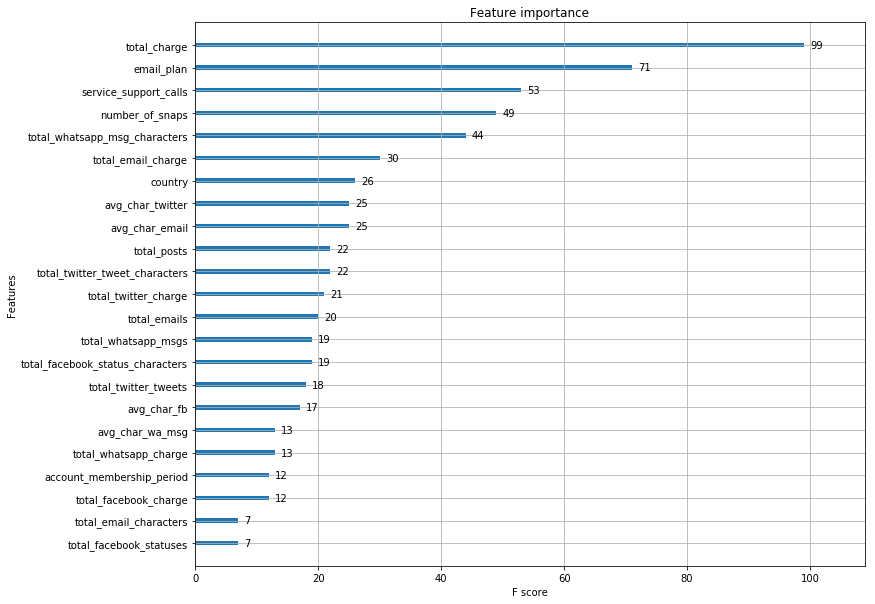

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(12, 10))
plot_importance(xgb,ax=ax)
plt.show()

In [42]:
sorted_idx = np.argsort(xgb.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train.columns[index], xgb.feature_importances_[index]]) 

['total_charge', 0.15372671]
['email_plan', 0.11024845]
['service_support_calls', 0.08229814]
['number_of_snaps', 0.07608695]
['total_whatsapp_msg_characters', 0.06832298]
['total_email_charge', 0.04658385]
['country', 0.04037267]
['avg_char_email', 0.038819876]
['avg_char_twitter', 0.038819876]
['total_posts', 0.03416149]
['total_twitter_tweet_characters', 0.03416149]
['total_twitter_charge', 0.032608695]
['total_emails', 0.031055901]
['total_whatsapp_msgs', 0.029503105]
['total_facebook_status_characters', 0.029503105]
['total_twitter_tweets', 0.027950311]
['avg_char_fb', 0.026397515]
['avg_char_wa_msg', 0.020186335]
['total_whatsapp_charge', 0.020186335]
['account_membership_period', 0.01863354]
['total_facebook_charge', 0.01863354]
['total_facebook_statuses', 0.010869565]
['total_email_characters', 0.010869565]
['snapchat_plan', 0.0]
['social_sites', 0.0]


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

In [44]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
preds=rf.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(preds,y_test)) #rf giving lowest validation scores

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       197
           1       0.78      0.93      0.85        27

   micro avg       0.96      0.96      0.96       224
   macro avg       0.89      0.95      0.91       224
weighted avg       0.96      0.96      0.96       224



In [48]:
import catboost as cb
from catboost import Pool

cb=cb.CatBoostClassifier()

In [49]:
cb.fit(X_train,y_train)

0:	learn: 0.6708952	total: 100ms	remaining: 1m 40s
1:	learn: 0.6489021	total: 146ms	remaining: 1m 13s
2:	learn: 0.6249241	total: 190ms	remaining: 1m 3s
3:	learn: 0.6056376	total: 227ms	remaining: 56.5s
4:	learn: 0.5849166	total: 274ms	remaining: 54.6s
5:	learn: 0.5620557	total: 311ms	remaining: 51.5s
6:	learn: 0.5426277	total: 353ms	remaining: 50s
7:	learn: 0.5234030	total: 392ms	remaining: 48.6s
8:	learn: 0.5093179	total: 437ms	remaining: 48.1s
9:	learn: 0.4974542	total: 461ms	remaining: 45.7s
10:	learn: 0.4833704	total: 502ms	remaining: 45.1s
11:	learn: 0.4708996	total: 542ms	remaining: 44.6s
12:	learn: 0.4595717	total: 588ms	remaining: 44.7s
13:	learn: 0.4432731	total: 637ms	remaining: 44.9s
14:	learn: 0.4323548	total: 678ms	remaining: 44.5s
15:	learn: 0.4234042	total: 721ms	remaining: 44.4s
16:	learn: 0.4111591	total: 767ms	remaining: 44.4s
17:	learn: 0.4014718	total: 802ms	remaining: 43.8s
18:	learn: 0.3902758	total: 847ms	remaining: 43.7s
19:	learn: 0.3811761	total: 874ms	remaini

163:	learn: 0.1174282	total: 5.59s	remaining: 28.5s
164:	learn: 0.1173360	total: 5.61s	remaining: 28.4s
165:	learn: 0.1171118	total: 5.63s	remaining: 28.3s
166:	learn: 0.1167740	total: 5.66s	remaining: 28.3s
167:	learn: 0.1164930	total: 5.69s	remaining: 28.2s
168:	learn: 0.1163370	total: 5.72s	remaining: 28.1s
169:	learn: 0.1160792	total: 5.75s	remaining: 28.1s
170:	learn: 0.1157844	total: 5.78s	remaining: 28s
171:	learn: 0.1155487	total: 5.81s	remaining: 28s
172:	learn: 0.1153994	total: 5.84s	remaining: 27.9s
173:	learn: 0.1152060	total: 5.87s	remaining: 27.8s
174:	learn: 0.1149006	total: 5.89s	remaining: 27.8s
175:	learn: 0.1147233	total: 5.92s	remaining: 27.7s
176:	learn: 0.1145422	total: 5.95s	remaining: 27.7s
177:	learn: 0.1143727	total: 5.98s	remaining: 27.6s
178:	learn: 0.1141956	total: 6.01s	remaining: 27.6s
179:	learn: 0.1140106	total: 6.04s	remaining: 27.5s
180:	learn: 0.1136957	total: 6.07s	remaining: 27.5s
181:	learn: 0.1135145	total: 6.1s	remaining: 27.4s
182:	learn: 0.113

323:	learn: 0.0984898	total: 10.9s	remaining: 22.7s
324:	learn: 0.0984103	total: 10.9s	remaining: 22.6s
325:	learn: 0.0983184	total: 10.9s	remaining: 22.6s
326:	learn: 0.0982553	total: 11s	remaining: 22.6s
327:	learn: 0.0981867	total: 11s	remaining: 22.5s
328:	learn: 0.0981635	total: 11s	remaining: 22.5s
329:	learn: 0.0980746	total: 11.1s	remaining: 22.5s
330:	learn: 0.0978259	total: 11.1s	remaining: 22.5s
331:	learn: 0.0976950	total: 11.2s	remaining: 22.4s
332:	learn: 0.0975292	total: 11.2s	remaining: 22.4s
333:	learn: 0.0974605	total: 11.2s	remaining: 22.4s
334:	learn: 0.0973178	total: 11.3s	remaining: 22.4s
335:	learn: 0.0973101	total: 11.3s	remaining: 22.4s
336:	learn: 0.0972610	total: 11.4s	remaining: 22.4s
337:	learn: 0.0971824	total: 11.4s	remaining: 22.4s
338:	learn: 0.0970803	total: 11.4s	remaining: 22.3s
339:	learn: 0.0970327	total: 11.5s	remaining: 22.3s
340:	learn: 0.0969086	total: 11.5s	remaining: 22.3s
341:	learn: 0.0968468	total: 11.6s	remaining: 22.3s
342:	learn: 0.0964

483:	learn: 0.0844561	total: 16.4s	remaining: 17.5s
484:	learn: 0.0841566	total: 16.5s	remaining: 17.5s
485:	learn: 0.0841049	total: 16.5s	remaining: 17.5s
486:	learn: 0.0840987	total: 16.5s	remaining: 17.4s
487:	learn: 0.0839456	total: 16.6s	remaining: 17.4s
488:	learn: 0.0837829	total: 16.6s	remaining: 17.4s
489:	learn: 0.0836118	total: 16.6s	remaining: 17.3s
490:	learn: 0.0835059	total: 16.7s	remaining: 17.3s
491:	learn: 0.0833515	total: 16.7s	remaining: 17.2s
492:	learn: 0.0833260	total: 16.7s	remaining: 17.2s
493:	learn: 0.0833177	total: 16.8s	remaining: 17.2s
494:	learn: 0.0833091	total: 16.8s	remaining: 17.1s
495:	learn: 0.0830901	total: 16.8s	remaining: 17.1s
496:	learn: 0.0829538	total: 16.8s	remaining: 17s
497:	learn: 0.0828694	total: 16.9s	remaining: 17s
498:	learn: 0.0828599	total: 16.9s	remaining: 17s
499:	learn: 0.0828394	total: 16.9s	remaining: 16.9s
500:	learn: 0.0827582	total: 17s	remaining: 16.9s
501:	learn: 0.0827530	total: 17s	remaining: 16.9s
502:	learn: 0.0826452	

648:	learn: 0.0693796	total: 21.4s	remaining: 11.6s
649:	learn: 0.0691704	total: 21.4s	remaining: 11.5s
650:	learn: 0.0691250	total: 21.4s	remaining: 11.5s
651:	learn: 0.0690836	total: 21.5s	remaining: 11.5s
652:	learn: 0.0690648	total: 21.5s	remaining: 11.4s
653:	learn: 0.0690391	total: 21.5s	remaining: 11.4s
654:	learn: 0.0690227	total: 21.6s	remaining: 11.3s
655:	learn: 0.0689632	total: 21.6s	remaining: 11.3s
656:	learn: 0.0688678	total: 21.6s	remaining: 11.3s
657:	learn: 0.0687258	total: 21.6s	remaining: 11.2s
658:	learn: 0.0686616	total: 21.7s	remaining: 11.2s
659:	learn: 0.0683541	total: 21.7s	remaining: 11.2s
660:	learn: 0.0682446	total: 21.7s	remaining: 11.1s
661:	learn: 0.0680972	total: 21.8s	remaining: 11.1s
662:	learn: 0.0679361	total: 21.8s	remaining: 11.1s
663:	learn: 0.0677381	total: 21.8s	remaining: 11s
664:	learn: 0.0676566	total: 21.8s	remaining: 11s
665:	learn: 0.0675122	total: 21.9s	remaining: 11s
666:	learn: 0.0674985	total: 21.9s	remaining: 10.9s
667:	learn: 0.0674

809:	learn: 0.0554745	total: 26.1s	remaining: 6.13s
810:	learn: 0.0552888	total: 26.2s	remaining: 6.09s
811:	learn: 0.0551995	total: 26.2s	remaining: 6.06s
812:	learn: 0.0550721	total: 26.2s	remaining: 6.03s
813:	learn: 0.0550585	total: 26.2s	remaining: 6s
814:	learn: 0.0549333	total: 26.3s	remaining: 5.96s
815:	learn: 0.0548943	total: 26.3s	remaining: 5.93s
816:	learn: 0.0548126	total: 26.3s	remaining: 5.9s
817:	learn: 0.0547151	total: 26.4s	remaining: 5.87s
818:	learn: 0.0547112	total: 26.4s	remaining: 5.83s
819:	learn: 0.0546971	total: 26.4s	remaining: 5.8s
820:	learn: 0.0544968	total: 26.4s	remaining: 5.77s
821:	learn: 0.0543901	total: 26.5s	remaining: 5.73s
822:	learn: 0.0542566	total: 26.5s	remaining: 5.7s
823:	learn: 0.0541127	total: 26.5s	remaining: 5.67s
824:	learn: 0.0540966	total: 26.6s	remaining: 5.63s
825:	learn: 0.0538546	total: 26.6s	remaining: 5.6s
826:	learn: 0.0538287	total: 26.6s	remaining: 5.57s
827:	learn: 0.0536395	total: 26.7s	remaining: 5.54s
828:	learn: 0.05352

968:	learn: 0.0448179	total: 31.4s	remaining: 1s
969:	learn: 0.0447557	total: 31.4s	remaining: 971ms
970:	learn: 0.0447128	total: 31.4s	remaining: 939ms
971:	learn: 0.0447012	total: 31.5s	remaining: 907ms
972:	learn: 0.0446269	total: 31.5s	remaining: 875ms
973:	learn: 0.0445297	total: 31.6s	remaining: 843ms
974:	learn: 0.0444673	total: 31.6s	remaining: 810ms
975:	learn: 0.0444579	total: 31.6s	remaining: 778ms
976:	learn: 0.0442710	total: 31.7s	remaining: 746ms
977:	learn: 0.0442423	total: 31.7s	remaining: 714ms
978:	learn: 0.0442163	total: 31.8s	remaining: 682ms
979:	learn: 0.0442013	total: 31.8s	remaining: 649ms
980:	learn: 0.0441103	total: 31.9s	remaining: 617ms
981:	learn: 0.0440302	total: 31.9s	remaining: 585ms
982:	learn: 0.0440198	total: 31.9s	remaining: 552ms
983:	learn: 0.0439596	total: 32s	remaining: 520ms
984:	learn: 0.0439114	total: 32s	remaining: 488ms
985:	learn: 0.0437354	total: 32.1s	remaining: 455ms
986:	learn: 0.0435807	total: 32.1s	remaining: 423ms
987:	learn: 0.04354

In [50]:
preds=cb.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       194
         1.0       0.84      0.90      0.87        30

   micro avg       0.96      0.96      0.96       224
   macro avg       0.91      0.94      0.93       224
weighted avg       0.97      0.96      0.96       224



In [53]:
feature_importances = cb.get_feature_importance(Pool(X_train,y_train))
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

total_charge: 24.08729361471844
service_support_calls: 12.666887554643258
email_plan: 10.623213702690252
total_email_charge: 4.9542261631610955
total_emails: 4.715431093935818
avg_char_email: 4.075540910357667
snapchat_plan: 3.1231831439345483
country: 2.7157568379222785
avg_char_fb: 2.6983729954418325
total_twitter_tweet_characters: 2.6905602253651777
avg_char_twitter: 2.6179605044288956
number_of_snaps: 2.610308746938111
total_whatsapp_msg_characters: 2.4804050091420353
total_twitter_charge: 1.9544319985609597
total_whatsapp_msgs: 1.8878645375856347
total_twitter_tweets: 1.87157178011878
total_facebook_statuses: 1.6887530343456008
total_facebook_status_characters: 1.646332095215431
account_membership_period: 1.6419981446966498
total_email_characters: 1.6252429578103518
total_facebook_charge: 1.6126658469717978
social_sites: 1.5610608335283311
avg_char_wa_msg: 1.5154643057276702
total_posts: 1.4902271918291483
total_whatsapp_charge: 1.445246770930257


In [54]:
feature_names

Index(['total_facebook_statuses', 'account_membership_period',
       'service_support_calls', 'number_of_snaps', 'total_whatsapp_charge',
       'total_twitter_tweets', 'country', 'total_email_characters',
       'email_plan', 'total_whatsapp_msg_characters', 'total_whatsapp_msgs',
       'total_facebook_charge', 'total_twitter_charge', 'snapchat_plan',
       'total_email_charge', 'total_twitter_tweet_characters', 'total_emails',
       'total_facebook_status_characters', 'avg_char_wa_msg',
       'avg_char_twitter', 'avg_char_fb', 'avg_char_email', 'total_charge',
       'total_posts', 'social_sites'],
      dtype='object')

In [55]:
train.columns

Index(['total_facebook_statuses', 'account_membership_period',
       'service_support_calls', 'number_of_snaps', 'total_whatsapp_charge',
       'total_twitter_tweets', 'country', 'total_email_characters',
       'email_plan', 'total_whatsapp_msg_characters', 'total_whatsapp_msgs',
       'total_facebook_charge', 'total_twitter_charge', 'snapchat_plan',
       'total_email_charge', 'total_twitter_tweet_characters', 'total_emails',
       'total_facebook_status_characters', 'turn_anti_social',
       'avg_char_wa_msg', 'avg_char_twitter', 'avg_char_fb', 'avg_char_email',
       'total_charge', 'total_posts', 'social_sites'],
      dtype='object')

In [56]:
final_preds=xgb.predict(test)

In [57]:
final_preds2=rf.predict(test)

In [58]:
final_preds3=cb.predict(test)

In [59]:
submiss=pd.read_csv('sample_submission.csv')
submiss.head(1)

,uid,turn_anti_social
0,0,1


In [60]:
submiss.drop('turn_anti_social',axis=1,inplace=True)
submiss['turn_anti_social']=final_preds
submiss.to_csv('xgb_sub.csv',index=False) #gives 2nd highest f1-score

In [61]:
submiss.drop('turn_anti_social',axis=1,inplace=True)
submiss['turn_anti_social']=final_preds3
submiss.to_csv('cb_sub.csv',index=False) #gives highest f1-score

#### Some more experiments that can be tried are:

#### i) Logarithmic transformation of the numerical columns
#### ii) Dimensional Reductional Techniques like PCA
#### iii) Recursive Feature Elimination for selecting best features
#### iv) Stacking